In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Python version: 3.6

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import copy
import numpy as np
from torchvision import datasets, transforms
import torch

from utils.sampling import mnist_iid, mnist_noniid, cifar_iid
from utils.options import _parser
from models.Update import LocalUpdate
from models.Nets import MLP, CNNMnist, CNNCifar
from models.Fed import FedAvg
from models.test import test_img

### Seed settings
- If you want the seed to be set manually, uncomment and set the seed value in these files:
- also change uncomment the lines with `torch.backends.cudnn.deterministic = True`
1. utils/sampling.py
2. main_fed.py
3. models/Nets.py

## Run the layer-colapse.py
- This command is equivalent to running it from the console
- Results are saved in federated-learning/save/test.png

In [2]:
import sys
sys.path.append('../')
%run ../layer-collapse-similarity-test.py --model resnet18 --dataset cifar --epochs_start 0 --compensation --epochs_end 200 --epochs_step 3 --local_ep 5 --gpu 0 --num_channels 1 --num_users 50 --local_bs 64 --p 0.0001 --lr 0.001 --compression 2.5 --prune_epochs 100 --pruner synflow

cuda:0
NVIDIA H100 80GB HBM3 MIG 1g.10gb
../save/results/synflow/synflow-p00-spar06-comp
Files already downloaded and verified
Files already downloaded and verified
[2 8 4 9 1]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3

RuntimeError: NVML_SUCCESS == r INTERNAL ASSERT FAILED at "../c10/cuda/CUDACachingAllocator.cpp":1154, please report a bug to PyTorch. 



## Testing plots

- The code below is for testing plots from the results printed by manually copying them.
- To plot the results directly, uncomment the `plt.show()` line
- To save the results, uncomment the `plt.savefig()` line


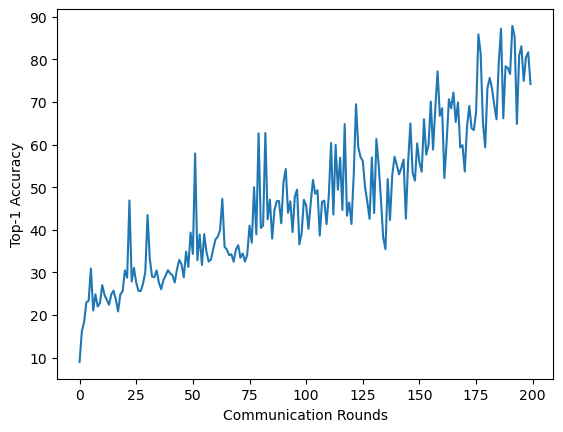

In [4]:
import matplotlib.pyplot as plt
import torch
import os
import datetime
import numpy as np

model = "resnet18"
dataset =  "cifar" 
epochs_start =  0 
compensation = True 
epochs_end = 200 
epochs_step = 1 
local_ep = 5 
gpu =  0 
num_channels = 1 
num_users = 50 
local_bs =  128 
p = 0.6
lr = 0.001
compression = 2.5
prune_epochs = 100
pruner = "mag"
iid = False
y_vals = {}
y_vals['acc'] = [8.981337547302246, 16.135303497314453, 18.390357971191406, 22.978227615356445, 23.328149795532227, 30.90979766845703, 21.073095321655273, 24.844478607177734, 22.006221771240234, 22.783824920654297, 27.021772384643555, 24.72783851623535, 23.561429977416992, 22.395023345947266, 24.844478607177734, 25.699844360351562, 23.639190673828125, 20.839813232421875, 24.883359909057617, 25.544322967529297, 30.482114791870117, 28.77138328552246, 46.88957977294922, 27.877138137817383, 31.065319061279297, 27.566097259521484, 25.660964965820312, 25.62208366394043, 27.371694564819336, 30.054431915283203, 43.468116760253906, 33.125972747802734, 29.00466537475586, 28.888025283813477, 30.482114791870117, 27.604976654052734, 26.049766540527344, 28.188180923461914, 29.276826858520508, 30.52099609375, 29.743391036987305, 29.31570816040039, 27.643856048583984, 30.754276275634766, 32.93157196044922, 31.881803512573242, 28.849143981933594, 34.87558364868164, 31.298601150512695, 39.3468132019043, 34.331260681152344, 57.93157196044922, 32.85380935668945, 38.8802490234375, 31.726282119750977, 38.996891021728516, 34.797821044921875, 32.54276657104492, 33.04821014404297, 35.53654861450195, 37.75271987915039, 38.4136848449707, 39.968894958496094, 47.239501953125, 36.003108978271484, 35.34214782714844, 34.05909729003906, 34.25349807739258, 32.50388717651367, 35.38102722167969, 36.39191436767578, 33.437015533447266, 34.447898864746094, 32.54276657104492, 34.17573928833008, 40.97978210449219, 36.97511672973633, 50.0, 38.91912841796875, 62.63608169555664, 40.43545913696289, 41.01866149902344, 62.71384048461914, 42.45723342895508, 47.083980560302734, 37.94712448120117, 44.595645904541016, 46.73405838012695, 46.7729377746582, 41.524105072021484, 51.24416732788086, 54.27682876586914, 43.97356033325195, 46.6951789855957, 39.46345138549805, 47.82270431518555, 49.41679763793945, 36.5863151550293, 39.15241241455078, 47.045101165771484, 45.762054443359375, 40.241058349609375, 46.150856018066406, 51.710731506347656, 48.44478988647461, 49.30015563964844, 38.646968841552734, 46.57853698730469, 46.85070037841797, 41.32970428466797, 48.13374710083008, 60.38102722167969, 43.58475875854492, 59.91446304321289, 49.41679763793945, 56.920684814453125, 44.634525299072266, 64.8133773803711, 43.31259536743164, 46.38413619995117, 41.36858367919922, 52.993778228759766, 69.47900390625, 59.370140075683594, 57.07620620727539, 56.18196105957031, 50.0, 46.50077819824219, 42.57387161254883, 56.998443603515625, 43.9346809387207, 61.314151763916016, 55.28771209716797, 47.1617431640625, 38.21928405761719, 35.45878601074219, 51.90513229370117, 42.30171203613281, 52.8382568359375, 57.15396499633789, 55.20995330810547, 53.032657623291016, 54.510108947753906, 56.49300003051758, 42.61275100708008, 55.83203887939453, 64.9688949584961, 53.3825798034668, 51.55521011352539, 60.30326461791992, 55.754276275634766, 53.65474319458008, 65.94090270996094, 57.65940856933594, 59.87558364868164, 70.10108947753906, 58.8258171081543, 68.5458755493164, 77.21617126464844, 66.75738525390625, 68.5458755493164, 52.13841247558594, 60.69207000732422, 70.6454086303711, 68.5458755493164, 72.239501953125, 65.31881713867188, 69.90668487548828, 59.331260681152344, 59.87558364868164, 53.69362258911133, 64.30792999267578, 69.09020233154297, 63.84136962890625, 63.4136848449707, 67.69051361083984, 85.88646697998047, 81.49300384521484, 65.31881713867188, 59.370140075683594, 73.2503890991211, 75.66096496582031, 73.2503890991211, 69.323486328125, 65.94090270996094, 79.23794555664062, 87.2083969116211, 66.17418670654297, 78.38258361816406, 77.99378204345703, 76.5940933227539, 87.8693618774414, 85.38102722167969, 64.85225677490234, 80.87091827392578, 83.08708953857422, 74.96112060546875, 80.48211669921875, 81.6874008178711, 74.22239685058594]
y_vals['loss'] = [3.9950079050256897, 2.4147744920353866, 2.3226610779947663, 2.0948201775736237, 3.4239166980583224, 1.95855476474317, 2.164020165314385, 1.9993634238769626, 2.558656527873702, 2.4075308557987953, 1.9226252762006935, 2.6667772474036804, 2.5111469028526296, 2.5612265585369864, 2.117267497405294, 2.485352510983243, 2.4629535838196843, 2.4071484264652616, 2.1801854188483016, 2.104550016056138, 1.871737741200401, 3.821711209476643, 1.598161164190313, 2.3122431857404218, 1.8044695527890977, 3.527160404258716, 2.443557101497383, 2.2751621792142167, 2.2340157821797657, 2.85538294155898, 1.637651734181548, 1.8366187163867624, 2.1863407028221973, 2.323823554334151, 1.9699629549290493, 3.1835406186235824, 2.514778300355048, 1.6711241431406831, 1.814634759911853, 2.310271266830468, 1.7743774906472878, 1.6075634852538399, 1.6516424812388086, 1.5297467838364478, 2.25053240685589, 1.6212183743205448, 1.6561873926901336, 2.158102464156796, 1.6901915529467642, 1.1241106308452078, 2.0318154398798014, 1.1050962311669048, 1.6434309330550174, 1.297107951637375, 2.1696111121407564, 0.9788815975189209, 2.7464561158353766, 2.387750136166301, 2.7731281847086144, 1.6447851209210385, 0.8706201524423033, 1.6073240777752817, 1.4795503482848267, 1.627377276472504, 1.9026514568002562, 2.043721700345005, 2.612555004019018, 1.3738008709754765, 2.159714781848676, 1.0545203374296102, 1.350212200989434, 1.9701594846615709, 3.3421183922798785, 4.345598547121229, 1.4806518235807284, 2.195055650144491, 1.383511168033487, 1.3104207408187178, 1.6100842555981958, 1.6532066672994041, 1.580778440086875, 1.5153522091000855, 2.8591067045695304, 1.6640483298531588, 1.1573648908831655, 1.7955975332304628, 1.927482012456535, 1.4267152382834332, 1.6493289326064138, 1.8999389549065526, 1.2107655679456553, 1.6526393660490473, 1.5247065316462776, 0.9742834434538941, 1.4216892863877268, 0.9863935050845702, 0.7315810757513921, 1.3391146593108705, 1.1339394901625661, 2.156545437327811, 1.579047004320017, 0.9835788836560762, 1.1113201656015257, 0.9586839012187525, 1.4534420818785672, 1.1006022656501544, 1.69746168664603, 1.6309495083466288, 2.1413614012034463, 1.3420253867865721, 1.055638692983387, 1.4456105269317865, 1.3914278918069036, 1.166900999994708, 0.37210151270425895, 0.6041398120705114, 1.4065481118429133, 1.8395406313669256, 0.9577016185268088, 0.8265328878192101, 1.1018056608099218, 1.0403396404735037, 1.1725413458158218, 0.6556564315481468, 0.35454684801828434, 1.2059474551288374, 0.7428514399387602, 0.7781247282473147, 0.7671891523186193, 0.3225450230238041, 0.4527377507549422, 1.6764551862773036, 0.642132180845756, 0.57126224782567, 0.9042172480148624, 0.6839110840164113, 0.5990429940527743, 0.9365472212364292]
x_vals = [i for i in range(200)]
plt.figure()
plt.plot(x_vals, y_vals['acc'])
plt.xlabel('Communication Rounds')
plt.ylabel('Top-1 Accuracy')
plt.title('')

now = datetime.datetime.now()
date = now.strftime("%Y_%m_%d")
time = now.strftime("%H_%M_%S")

# Create the directory if it doesn't exist
save_dir = f"../save/{date}"
os.makedirs(save_dir, exist_ok=True)

# Save the plot
plt.savefig(f"{save_dir}/similarity_test_acc_{prune_epochs}_{compensation}_{dataset}_{model}_{iid}_{p}_{num_users}_{epochs_start}_{epochs_end}_{time}.png")
# plt.savefig('../save/synflow_test_{}_{}_{}_{}_{}_{}_{}.png'.format(.prune_epochs, .dataset, .model, .iid, .frac, .num_users, .epochs))
#plt.figure()
#plt.plot(x_vals, y_vals['loss'])
#plt.xlabel('Communication Rounds')
#plt.ylabel('Loss')
#plt.title('')
#plt.savefig(f"{save_dir}/similarity_test_loss_{pruner}_{prune_epochs}_{compensation}_{dataset}_{model}_{iid}_{p}_{num_users}_{epochs_start}_{epochs_end}_{time}.png")
np.savez(f"{save_dir}/similarity_test_loss_{pruner}_{prune_epochs}_{compensation}_{dataset}_{model}_{iid}_{p}_{num_users}_{epochs_start}_{epochs_end}_{time}", y = np.array(y_vals['loss']), x = np.array(x_vals))
#np.savez(f"{save_dir}/similarity_test_acc_{pruner}_{prune_epochs}_{compensation}_{dataset}_{model}_{iid}_{p}_{num_users}_{epochs_start}_{epochs_end}_{time}", y = np.array(y_vals['acc']), x = np.array(x_vals))